In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh

dff=pd.read_csv('dataframe_of_nothern_Ukraine.csv',delimiter=',',index_col=0 )
dff

,time,lon,lat,no2,o3,so2,pm2.5,pm10,co
0,1,23.55,51.75,5.252700,51.692347,2.654524,9.605743,12.695112,192.441569
1,2,23.55,51.75,7.707136,46.039968,3.895643,18.098120,25.414060,229.828125
2,3,23.55,51.75,9.924423,40.913612,4.210040,18.534868,22.058535,252.312439
3,4,23.55,51.75,11.300662,40.129539,7.031236,31.374064,40.542399,321.204244
4,5,23.55,51.75,4.829215,58.696457,2.343223,7.440000,11.433828,196.356608
...,...,...,...,...,...,...,...,...,...
78563,88,29.55,50.45,1.984611,64.259562,0.604152,6.088051,7.003332,139.368612
78564,89,29.55,50.45,1.527000,57.127258,0.217689,4.162439,4.099697,129.047353
78565,90,29.55,50.45,1.121115,66.479965,0.252951,4.161693,4.442520,144.590190
78566,91,29.55,50.45,0.909588,61.472402,0.217021,3.282997,3.462619,144.497070


In [70]:
dd=dff.corr()
dd.drop(columns=['pm2.5'])


,time,lon,lat,no2,o3,so2,pm10,co
time,1.000000e+00,3.141615e-16,-3.343364e-16,-0.401044,0.384411,-0.249115,-0.395535,-0.583603
lon,3.141615e-16,1.000000e+00,-3.538392e-13,-0.401664,0.036451,-0.477324,-0.234030,-0.211870
lat,-3.343364e-16,-3.538392e-13,1.000000e+00,-0.204583,0.050976,-0.137722,-0.099570,-0.076796
no2,-4.010443e-01,-4.016643e-01,-2.045826e-01,1.000000,-0.518834,0.713587,0.650456,0.755072
o3,3.844107e-01,3.645087e-02,5.097587e-02,-0.518834,1.000000,-0.059526,-0.299448,-0.501702
so2,-2.491152e-01,-4.773245e-01,-1.377223e-01,0.713587,-0.059526,1.000000,0.719308,0.589958
pm2.5,-3.730933e-01,-1.851586e-01,-1.098663e-01,0.629329,-0.311927,0.686588,0.988645,0.783630
pm10,-3.955351e-01,-2.340303e-01,-9.956952e-02,0.650456,-0.299448,0.719308,1.000000,0.773201
co,-5.836027e-01,-2.118697e-01,-7.679612e-02,0.755072,-0.501702,0.589958,0.773201,1.000000


In [71]:
pm25=np.array(dd['pm2.5'])
pm10=np.array(dd['pm10'])
pm25=pm25.__abs__()
a=pm25.sum()
pm10=pm10.__abs__()
b=pm10.sum()
print(a,b)
#choosing pm10 instead of pm2.5

5.068236500607242 5.160193486910744


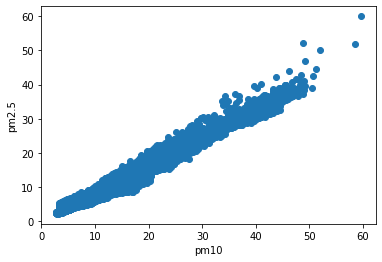

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
Y = dff['pm2.5']
X = dff['pm10']
plt.scatter(X, Y)
plt.xlabel('pm10')
plt.ylabel("pm2.5")
plt.show()

In [73]:
#pm2.5 independent part, pm10 dependent
x = np.array(dff['pm10']).reshape((-1, 1))
y = np.array(dff['pm2.5'])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
#intercept - це вільний член
a=model.intercept_
b=model.coef_
print(a,'+ x*',b)
print(r_sq)

0.189000105103295 + x* [0.80892057]
0.9774188133892213


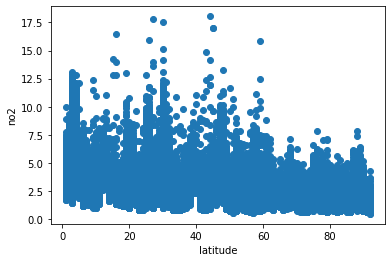

In [5]:
Y = dff['no2']
X = dff['time']
plt.scatter(X, Y)
plt.xlabel('')
plt.ylabel("no2")
plt.show()

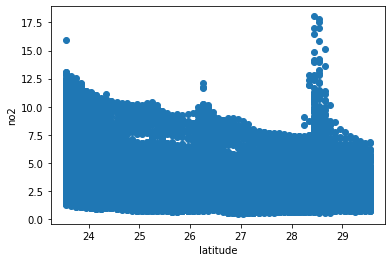

In [75]:
Y = dff['no2']
X = dff['lon']
plt.scatter(X, Y)
plt.xlabel('latitude')
plt.ylabel("no2")
plt.show()

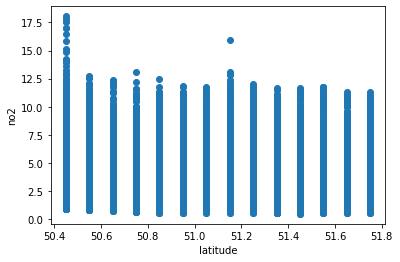

In [76]:
Y = dff['no2']
X = dff['lat']
plt.scatter(X, Y)
plt.xlabel('latitude')
plt.ylabel("no2")
plt.show()

In [77]:

coordinates=['time','lon','lat']
elem=['no2','o3','so2','pm10','co','pm2.5']

def regretion(dependent,independent):
    print(dependent,independent)
    x = np.array(dff[dependent]).reshape((-1, 1))
    y = np.array(dff[independent])
    model = LinearRegression().fit(x, y)
    #коефіцієнт детермінації метод score
    #linaer 1
    r_sq = model.score(x, y)
    print(r_sq)
    x_ln=np.log(x)
    x_ln.reshape((-1,1))
    x_1x=1/(x)
    x_1x.reshape((-1,1))
    y_ln=np.log(y)
    y_1y=1/(y)
    #2
    model = LinearRegression().fit(x, y_1y)
    r_sq = model.score(x, y_1y)
    print(r_sq)
    #3
    model = LinearRegression().fit(x, y_ln)
    r_sq = model.score(x, y_ln)
    print(r_sq)
    #4
    model = LinearRegression().fit(x_1x, y)
    r_sq = model.score(x_1x, y)
    print(r_sq)
    #5
    model = LinearRegression().fit(x_1x, y_1y)
    r_sq = model.score(x_1x, y_1y)
    print(r_sq)
    #6
    model = LinearRegression().fit(x_1x, y_ln)
    r_sq = model.score(x_1x, y_ln)
    print(r_sq)
    #7
    model = LinearRegression().fit(x_ln, y)
    r_sq = model.score(x_ln, y)
    print(r_sq)
    #8
    model = LinearRegression().fit(x_ln, y_1y)
    r_sq = model.score(x_ln, y_1y)
    print(r_sq)
    #9
    model = LinearRegression().fit(x_ln, y_ln)
    r_sq = model.score(x_ln, y_ln)
    print(r_sq)
    print('bla')
regretion(coordinates[0],elem[0])
regretion(coordinates[1],elem[0])
regretion(coordinates[2],elem[0])
print('sdfsdfsdf')
regretion(coordinates[0],elem[2])
regretion(coordinates[1],elem[2])
regretion(coordinates[2],elem[2])
print('sdfsdfsdf')
regretion(coordinates[0],elem[4])
regretion(coordinates[1],elem[4])
regretion(coordinates[2],elem[4])
print('sdfsdfsdf')
regretion(coordinates[0],elem[3])
regretion(coordinates[1],elem[3])
regretion(elem[0],elem[3])
regretion(elem[2],elem[3])
regretion(elem[4],elem[3])
print('sdfsdfsdf')
regretion(coordinates[0],elem[1])
regretion(coordinates[1],elem[1])
regretion(elem[0],elem[1])
regretion(elem[4],elem[1])
regretion(elem[3],elem[1])

time no2
0.16083650333755184
0.20769411252724468
0.20527309554914275
0.05678868392727332
0.0516139519124984
0.06039065041502101
0.15733371486886405
0.16661244094256467
0.18027303660359228
bla
lon no2
0.16133421736735087
0.1937077011445899
0.20618014771974558
0.16930579328594264
0.19966816288200906
0.21409828670999764
0.16540375402276308
0.19686868008950142
0.21029227908400205
bla
lat no2
0.04185402045255571
0.05865657848108097
0.05558079858507914
0.042025397332830394
0.05884298182902348
0.05578065097817708
0.04194019309248642
0.058750550050761796
0.0556814146470993
bla
sdfsdfsdf
time so2
0.062058389657251856
0.054702944322715163
0.06135453511382938
0.005393116639807349
7.919081790319638e-08
0.001101525695183292
0.04673250587087907
0.024158979221148957
0.035479435821897276
bla
lon so2
0.22783863645188118
0.17067691361897852
0.24926351130943392
0.23669665631677295
0.17324745541075015
0.25580720862361284
0.23242687996167477
0.17212912347908083
0.25274950691770115
bla
lat so2
0.01896742755

In [78]:
regretion(elem[3],elem[5])

pm10 pm2.5
0.9774188133892213
0.6300983149206912
0.8601913461455775
0.6168945885925504
0.9472000313966218
0.8670015291529249
0.8534929041748816
0.8790857675335617
0.967845627068789
bla


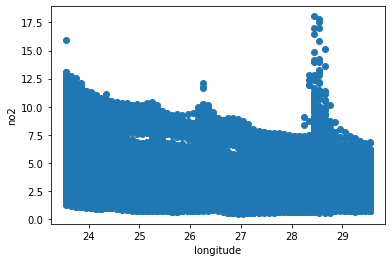

In [79]:
Y = dff['no2']
X = dff['lon']
plt.scatter(X, Y)
plt.xlabel('longitude')
plt.ylabel("no2")
plt.show()

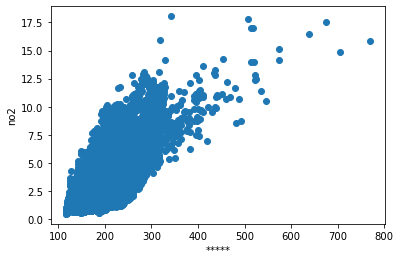

In [80]:
Y = dff['no2']
X = dff['co']
plt.scatter(X, Y)
plt.xlabel('*****')
plt.ylabel("no2")
plt.show()

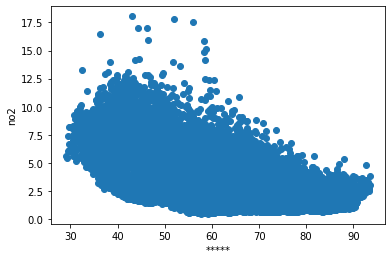

In [81]:
Y = dff['no2']
X = dff['o3']
plt.scatter(X, Y)
plt.xlabel('*****')
plt.ylabel("no2")
plt.show()

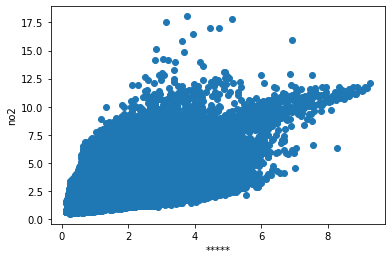

In [82]:
Y = dff['no2']
X = dff['so2']
plt.scatter(X, Y)
plt.xlabel('*****')
plt.ylabel("no2")
plt.show()

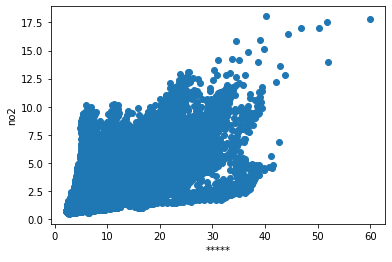

In [83]:
Y = dff['no2']
X = dff['pm2.5']
plt.scatter(X, Y)
plt.xlabel('*****')
plt.ylabel("no2")
plt.show()

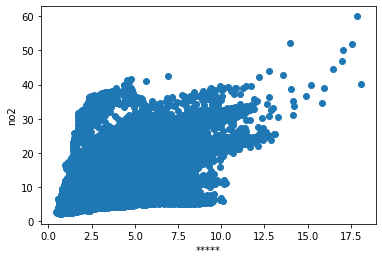

In [84]:
Y = dff['pm2.5']
X = dff['no2']
plt.scatter(X, Y)
plt.xlabel('*****')
plt.ylabel("no2")
plt.show()

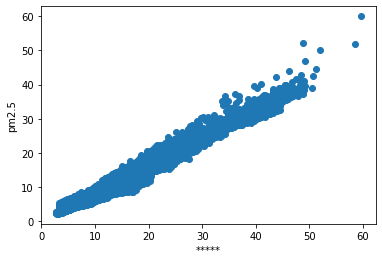

In [85]:
Y = dff['pm2.5']
X = dff['pm10']
plt.scatter(X, Y)
plt.xlabel('*****')
plt.ylabel("pm2.5")
plt.show()

In [121]:
import numpy as np
import sklearn.pipeline as pl
import sklearn.preprocessing as sp
#import sklearn.linear_model as lm
import sklearn.metrics as sm
import matplotlib.pyplot as mp
from sklearn.preprocessing import PolynomialFeatures
x = np.array(dff['time']).reshape((-1, 1))
y = np.array(dff['so2'])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
#intercept - це вільний член
a=model.intercept_
b=model.coef_
print(a,'+ x*',b)
print(r_sq)

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
m=pol_reg.score(X_poly,y)
m

2.0271251719596624 + x* [-0.01018638]
0.062058389657251856


0.06683077446022223

In [108]:
from sklearn.ensemble import RandomForestRegressor
coordinates=['time','lon','lat']
elem=['no2','o3','so2','pm10','co','pm2.5']
trn=dff.drop(columns=['pm2.5','so2','co','pm10','o3'],axis=1)
y = np.array(dff['no2'])
model1= RandomForestRegressor()
model1.fit(trn,y)
r_2=model1.score(trn,y)
c=model1.max_features




'auto'

'auto'